## LSTM Model to predict vessel status

## Table of Contents
1. [Description](#model-selection)
2. [Further Datapreparation](#further-datapreparation)
3. [Model Script](#model-script)
4. [Detailed Explanations](#explanation)

## Model Selection

The problem at hand is a binary classification task to predict the navigational status of vessels: "Under way using engine" versus "Engaged in fishing." After experimenting with various approaches, including Random Forest and CNN, an LSTM-based neural network was chosen for its ability to model sequential dependencies in time-series data. The LSTM architecture was selected due to its effectiveness in capturing temporal patterns in features such as Speed Over Ground (SOG), Course Over Ground (COG), and Heading.

---

## Feature Engineering

Feature engineering was a critical step in preparing the dataset for modeling. Key steps included:

1. **Normalization**: SOG values were normalized using MinMaxScaler to ensure all features were on a similar scale.
2. **Cyclical Encoding**: Circular features like COG and Heading were encoded using sine and cosine transformations to preserve their cyclical nature.
3. **Sequence Creation**: Each input sequence was created with a fixed length of 60 time steps, corresponding to 1 hour of data sampled at 1-minute intervals.
4. **Initial Course Adjustment**: The initial COG was subtracted from all COG and Heading values to standardize the directionality across sequences.

---

## Hyperparameter Tuning

Hyperparameter tuning was conducted using a combination of manual experimentation and automated tools like Keras Tuner. Key hyperparameters tuned included:

1. **Number of LSTM Layers and Units**: Experiments with single and multi-layer LSTM architectures led to the final choice of two LSTM layers with 64 and 32 units, respectively.
2. **Dropout Rates**: Dropout rates of 0.3 were applied after each LSTM layer to mitigate overfitting.
3. **Batch Size and Learning Rate**: A batch size of 32 and the Adam optimizer with default learning rates provided the best results.
4. **Activation Functions**: The final output layer used a sigmoid activation function for binary classification.

---

## Implementation

The LSTM model was implemented using TensorFlow/Keras. The architecture consisted of:

- Two LSTM layers (64 and 32 units) with return sequences enabled for the first layer.
- Dropout layers after each LSTM layer.
- A Dense layer with 32 units and ReLU activation.
- A final Dense layer with a sigmoid activation function for binary classification.

Training was conducted with early stopping to monitor validation loss, with a patience of 10 epochs to prevent overfitting. The model was trained for up to 200 epochs, with validation split set to 20% of the training data.

---

## Evaluation Metrics

The model’s performance was evaluated using:

1. **Accuracy**: Achieved a test accuracy of 0.99.
2. **F1 Score**: Recorded an F1 score of 0.99, indicating a balance between precision and recall.
3. **Precision and Recall**: Precision and recall scores were 0.99 and 0.98, respectively, demonstrating the model’s ability to minimize false positives and false negatives.
4. **Confusion Matrix**: Highlighted the model’s ability to correctly classify both classes with minimal misclassifications.
5. **ROC Curve and AUC**: The AUC of 0.99 indicated excellent model discrimination.

---

## Comparative Analysis

The LSTM model outperformed other approaches, including:

1. **Baseline Random Forest Model**: Achieved an accuracy of 0.68–0.78, but struggled to recognize certain classes and lacked temporal modeling capabilities.
2. **CNN Architecture**: While capable of capturing spatial patterns, the CNN overfitted and did not leverage temporal dependencies effectively.
3. **Flattened Data Approach**: Flattening sequences into vectors led to faster computation but resulted in overfitting and lower generalization performance.

The final LSTM model’s ability to capture temporal dependencies, combined with robust feature engineering and careful hyperparameter tuning, resulted in a significant performance improvement, making it the best-performing model for this task.



## Further Datapreparation

In [3]:
import os
import shutil
import pandas as pd

# Define the source and destination folders
source_folder = './time_sets_st_shortened'
destination_folder = './input/engaged_in_fishing'

# Ensure destination folder exists
os.makedirs(destination_folder, exist_ok=True)

# Iterate over each file in the source folder
for filename in os.listdir(source_folder):
    # Check if the file is a CSV file
    if filename.endswith('.csv'):
        file_path = os.path.join(source_folder, filename)
        
        # Try to read the CSV file
        try:
            df = pd.read_csv(file_path)

            # Check if 'Navigational status' column exists and contains the value 'Underway using engine'
            if 'Navigational status' in df.columns and 'Engaged in fishing' in df['Navigational status'].values:
                # If the condition is met, copy the file to the destination folder
                shutil.copy(file_path, os.path.join(destination_folder, filename))
                print(f"Copied: {filename}")
        except Exception as e:
            print(f"Could not process {filename}: {e}")

print("Script execution completed.")


Copied: filtered_219001518_20240519_0000-20240519_0159_standardized_60s.csv
Copied: filtered_219001518_20240519_0200-20240519_0359_standardized_60s.csv
Copied: filtered_219001518_20240519_0400-20240519_0559_standardized_60s.csv
Copied: filtered_219001518_20240519_0600-20240519_0759_standardized_60s.csv
Copied: filtered_219001518_20240519_0800-20240519_0959_standardized_60s.csv
Copied: filtered_219001518_20240519_1000-20240519_1159_standardized_60s.csv
Copied: filtered_219001518_20240519_1200-20240519_1359_standardized_60s.csv
Copied: filtered_219001518_20240519_1400-20240519_1600_standardized_60s.csv
Copied: filtered_219001518_20240521_1200-20240521_1359_standardized_60s.csv
Copied: filtered_219001518_20240521_1400-20240521_1559_standardized_60s.csv
Copied: filtered_219001518_20240521_1600-20240521_1759_standardized_60s.csv
Copied: filtered_219001518_20240521_1800-20240521_1959_standardized_60s.csv
Copied: filtered_219001518_20240522_0400-20240522_0559_standardized_60s.csv
Copied: filt

## Model Script

Epoch 1/200
2720/2720 [==============================] - 47s 16ms/step - loss: 0.6336 - accuracy: 0.6440 - val_loss: 0.6035 - val_accuracy: 0.6754
Epoch 2/200
2720/2720 [==============================] - 43s 16ms/step - loss: 0.6037 - accuracy: 0.6748 - val_loss: 0.5852 - val_accuracy: 0.6868
Epoch 3/200
2720/2720 [==============================] - 43s 16ms/step - loss: 0.5801 - accuracy: 0.6930 - val_loss: 0.5767 - val_accuracy: 0.7023
Epoch 4/200
2720/2720 [==============================] - 43s 16ms/step - loss: 0.5558 - accuracy: 0.7122 - val_loss: 0.5457 - val_accuracy: 0.7173
Epoch 5/200
2720/2720 [==============================] - 43s 16ms/step - loss: 0.5281 - accuracy: 0.7329 - val_loss: 0.5338 - val_accuracy: 0.7232
Epoch 6/200
2720/2720 [==============================] - 39s 14ms/step - loss: 0.5049 - accuracy: 0.7479 - val_loss: 0.4860 - val_accuracy: 0.7677
Epoch 7/200
2720/2720 [==============================] - 39s 14ms/step - loss: 0.4790 - accuracy: 0.7677 - val_loss: 0

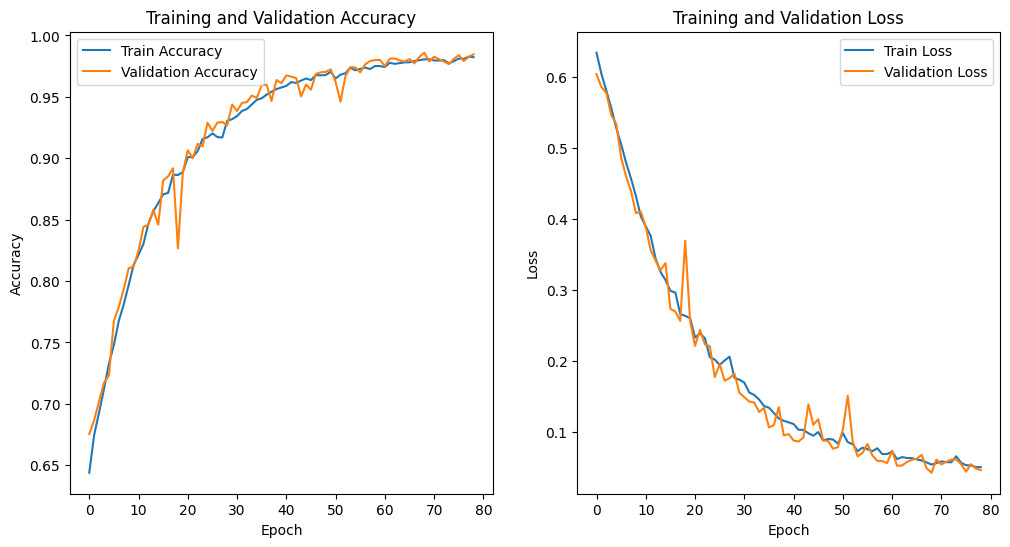

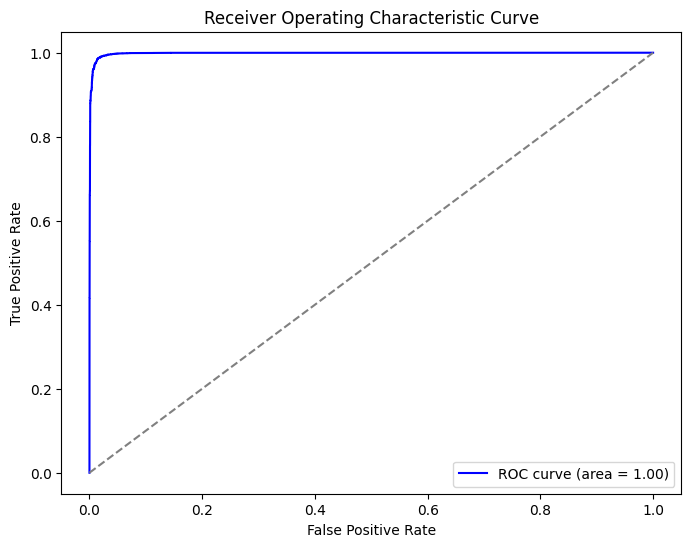

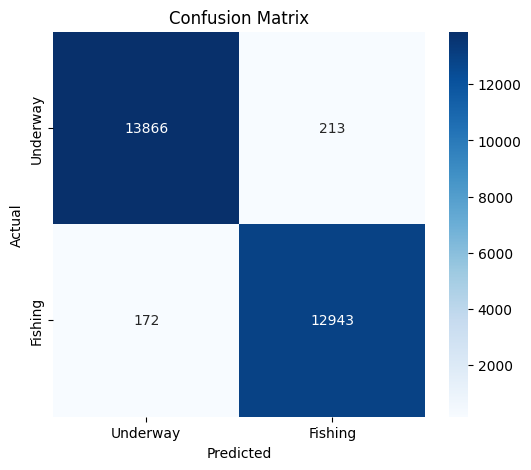

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     14079
           1       0.98      0.99      0.99     13115

    accuracy                           0.99     27194
   macro avg       0.99      0.99      0.99     27194
weighted avg       0.99      0.99      0.99     27194



In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Paths to the folders
folder_underway = "../5_Data_Pipeline/input/underway_using_engine"
folder_fishing = "../5_Data_Pipeline/input/engaged_in_fishing"

# Parameters
sequence_length = 60  # Length of time sequences (e.g., 1 hour if sampled every minute)
features = ['SOG', 'COG', 'Heading']  # Columns to use as features

# Function to load and preprocess data
def load_and_preprocess_data(folder, label, sequence_length, features):
    data = []
    labels = []
    file_origins = []
    for file in os.listdir(folder):
        if file.endswith('.csv'):
            df = pd.read_csv(os.path.join(folder, file))
            # Normalize SOG
            scaler = MinMaxScaler()
            df['SOG'] = scaler.fit_transform(df[['SOG']])
            
            # Encode COG and Heading cyclically
            df['COG_x'] = np.sin(np.radians(df['COG']))
            df['COG_y'] = np.cos(np.radians(df['COG']))
            df['Heading_x'] = np.sin(np.radians(df['Heading']))
            df['Heading_y'] = np.cos(np.radians(df['Heading']))
            
            # Select features
            feature_columns = ['SOG', 'COG_x', 'COG_y', 'Heading_x', 'Heading_y']
            df = df[feature_columns]
            
            # Create sequences
            for i in range(len(df) - sequence_length + 1):
                sequence = df.iloc[i:i + sequence_length].values
                data.append(sequence)
                labels.append(label)
                file_origins.append(file)  # Track the file name for this sequence
    return np.array(data), np.array(labels), np.array(file_origins)

# Load data from both folders
data_underway, labels_underway, files_underway = load_and_preprocess_data(folder_underway, 0, sequence_length, features)
data_fishing, labels_fishing, files_fishing = load_and_preprocess_data(folder_fishing, 1, sequence_length, features)

# Combine data
X = np.concatenate([data_underway, data_fishing], axis=0)
y = np.concatenate([labels_underway, labels_fishing], axis=0)
file_origins = np.concatenate([files_underway, files_fishing], axis=0)

# Train-test split (include file origins)
X_train, X_test, y_train, y_test, files_train, files_test = train_test_split(
    X, y, file_origins, test_size=0.2, random_state=42, stratify=y
)

# Build the LSTM model
model = Sequential([
    LSTM(64, input_shape=(sequence_length, X.shape[2]), return_sequences=True),
    Dropout(0.3),
    LSTM(32),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")

# Predict probabilities and binary labels
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype('int')

# Store results in a DataFrame
results = pd.DataFrame({
    'file': files_test,
    'true_label': y_test,
    'predicted_label': y_pred.flatten()
})

# Add a column for misclassification
results['misclassified'] = results['true_label'] != results['predicted_label']

# Group by file and count misclassifications
misclassified_summary = results.groupby('file')['misclassified'].sum().reset_index()
misclassified_summary = misclassified_summary.sort_values(by='misclassified', ascending=False)

# Display files with the most misclassifications
print("Files with the most misclassified sequences:")
print(misclassified_summary.head(10))

# Save misclassification summary to a CSV file
misclassified_summary.to_csv('misclassified_summary.csv', index=False)

# Plot Learning Curves
def plot_learning_curve(history):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# ROC Curve
def plot_roc_curve(y_true, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='b', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title('Receiver Operating Characteristic Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Underway', 'Fishing'], yticklabels=['Underway', 'Fishing'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Print Classification Report
def print_classification_report(y_true, y_pred):
    print(classification_report(y_true, y_pred))

# Visualizations and Metrics
plot_learning_curve(history)
plot_roc_curve(y_test, y_pred_prob)
plot_confusion_matrix(y_test, y_pred)
print_classification_report(y_test, y_pred)

In [2]:
# Save the model
model.save("navigational_status_classifier.h5")

# Explanation

### 1. **Loading CSV Files from the Folder:**
   - The function loops through the CSV files in the given folder, one by one. It reads each CSV file using `pandas.read_csv()` and processes the data. 
   - These CSV files contain the vessel's movement data with columns like `SOG`, `COG`, and `Heading`.

   **Example of data loaded from a CSV file:**

   | Timestamp | SOG | COG  | Heading |
   |-----------|-----|------|---------|
   | 00:00     | 5.4 | 45   | 60      |
   | 00:01     | 5.6 | 47   | 61      |
   | 00:02     | 5.7 | 50   | 62      |
   | ...       | ... | ...  | ...     |

   Here, **SOG** is the speed of the vessel, **COG** is the course (direction), and **Heading** is the heading angle.

### 2. **Normalization of `SOG` (Speed Over Ground):**
   - The `SOG` column is normalized using a `MinMaxScaler`, which scales all values to a range between 0 and 1.
   - **Normalization** is important because it brings different feature scales (e.g., speed vs. angle) to a similar range, making the training process more efficient.

   **Before normalization:**

   | Timestamp | SOG | COG  | Heading |
   |-----------|-----|------|---------|
   | 00:00     | 5.4 | 45   | 60      |
   | 00:01     | 5.6 | 47   | 61      |

   **After normalization:**

   The new values for `SOG` are calculated using:
   \[
   \text{Normalized SOG} = \frac{\text{SOG} - \text{min(SOG)}}{\text{max(SOG)} - \text{min(SOG)}}
   \]

   | Timestamp | Normalized SOG | COG  | Heading |
   |-----------|----------------|------|---------|
   | 00:00     | 0.00           | 45   | 60      |
   | 00:01     | 0.33           | 47   | 61      |

### 3. **Cyclic Encoding of `COG` and `Heading`:**
   - Both `COG` (Course Over Ground) and `Heading` are angular values, and as such, they have a **cyclic nature**: 0 degrees is the same as 360 degrees.
   - To properly handle this, **sine** and **cosine** transformations are applied:
     \[
     \text{COG}_x = \sin(\text{COG})
     \]
     \[
     \text{COG}_y = \cos(\text{COG})
     \]
     Similarly for `Heading`:
     \[
     \text{Heading}_x = \sin(\text{Heading})
     \]
     \[
     \text{Heading}_y = \cos(\text{Heading})
     \]
   - These transformations convert the angular values into two components that are easier for the model to learn from and capture cyclic relationships.

   **Example before and after cyclic encoding:**

   - **Before** (COG = 350 degrees, Heading = 10 degrees):
   
   | Timestamp | COG | Heading |
   |-----------|-----|---------|
   | 00:00     | 350 | 10      |

   - **After** (Apply sine and cosine transformations):
   
   | Timestamp | COG_x      | COG_y      | Heading_x  | Heading_y  |
   |-----------|------------|------------|------------|------------|
   | 00:00     | 0.1745     | 0.9848     | 0.1736     | 0.9848     |

### 4. **Selecting Relevant Features:**
   - After encoding the `COG` and `Heading`, the relevant features are selected: `SOG`, `COG_x`, `COG_y`, `Heading_x`, and `Heading_y`.
   - These features represent the vessel's speed and directional information in a form that the LSTM model can process.

   **Features selected for each time step:**

   | Timestamp | Normalized SOG | COG_x      | COG_y      | Heading_x  | Heading_y  |
   |-----------|----------------|------------|------------|------------|------------|
   | 00:00     | 0.00           | 0.1745     | 0.9848     | 0.1736     | 0.9848     |

### 5. **Creating Sequences:**
   - The LSTM model requires input data in the form of sequences (i.e., multiple time steps). Here, a sliding window approach is used to create sequences of `sequence_length` (e.g., 60 time steps).
   - For each sequence of 60 time steps, the features for those 60 steps are stacked into a 3D array (time steps, features per time step, and the number of sequences).
   - This helps the model learn patterns over time (e.g., how the vessel's behavior changes over an hour).

   **Example of sequences:**

   For a sequence length of 3, if the first 3 time steps look like this:
   
   | Timestamp | Normalized SOG | COG_x      | COG_y      | Heading_x  | Heading_y  |
   |-----------|----------------|------------|------------|------------|------------|
   | 00:00     | 0.00           | 0.1745     | 0.9848     | 0.1736     | 0.9848     |
   | 00:01     | 0.33           | 0.1736     | 0.9848     | 0.1732     | 0.9849     |
   | 00:02     | 0.50           | 0.1727     | 0.9850     | 0.1725     | 0.9850     |

   The model will receive a sequence of these 3 time steps as input for training.

### 6. **Labeling the Sequences:**
   - Each sequence is labeled with a binary value, depending on the activity of the vessel:
     - **0** for "underway using engine".
     - **1** for "engaged in fishing".
   - This label helps the model learn the relationship between the features and the vessel's activity.

### 7. **Loading and Combining Data:**
   - The function `load_and_preprocess_data` is called twice, once for the "underway" data and once for the "fishing" data.
   - After processing, the resulting feature arrays (`data_underway` and `data_fishing`) are concatenated together to form the complete dataset `X`, and their corresponding labels (`labels_underway` and `labels_fishing`) are concatenated to form the labels array `y`.

### Final Data Structure:
   After combining the data, you end up with:
   
   - **X**: A 3D array where each element represents a sequence of features (e.g., 60 time steps × 5 features per step = 300 features per sequence).
   
   - **y**: A 1D array with binary labels (0 or 1) indicating the vessel activity for each sequence.

---

### **Visualization of Sequences:**

Here’s how the sequences would look when plotted for `SOG`, `COG_x`, and `Heading_x` for a few time steps:

#### Example:

- **Sequence Data (3 time steps):**
  
  - `SOG`: [0.00, 0.33, 0.50]
  - `COG_x`: [0.1745, 0.1736, 0.1727]
  - `Heading_x`: [0.1736, 0.1732, 0.1725]


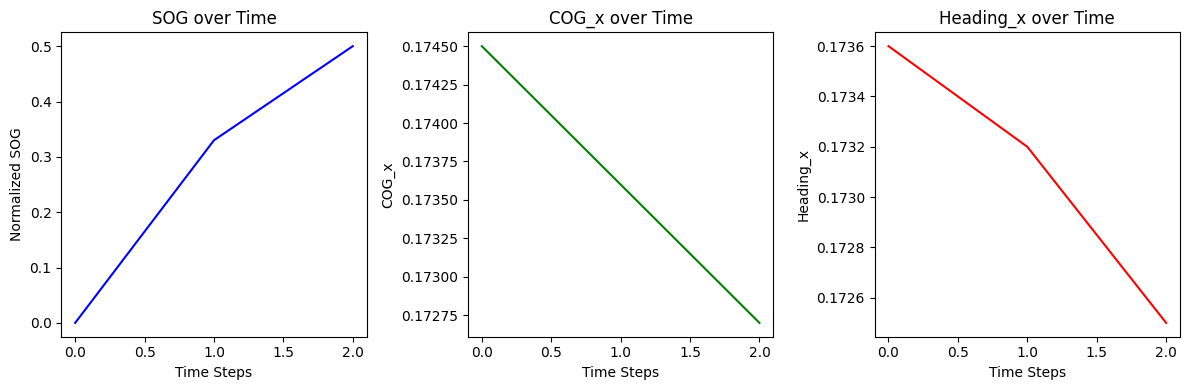

In [8]:
# Example sequences, like explained above.

import matplotlib.pyplot as plt

time_steps = [0, 1, 2]
SOG = [0.00, 0.33, 0.50]
COG_x = [0.1745, 0.1736, 0.1727]
Heading_x = [0.1736, 0.1732, 0.1725]

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(time_steps, SOG, label="SOG", color="blue")
plt.title("SOG over Time")
plt.xlabel("Time Steps")
plt.ylabel("Normalized SOG")

plt.subplot(1, 3, 2)
plt.plot(time_steps, COG_x, label="COG_x", color="green")
plt.title("COG_x over Time")
plt.xlabel("Time Steps")
plt.ylabel("COG_x")

plt.subplot(1, 3, 3)
plt.plot(time_steps, Heading_x, label="Heading_x", color="red")
plt.title("Heading_x over Time")
plt.xlabel("Time Steps")
plt.ylabel("Heading_x")

plt.tight_layout()
plt.show()


### Sliding Window in Sequence Creation

In the current model setup, the **sliding window** approach is used to create sequences of a fixed length. This means that the **length of each sequence is constant** throughout the model's training process. 

### What is the Sliding Window Approach?

The sliding window technique extracts **overlapping sequences** from the raw time series data. The key idea is that the **window size** (i.e., the number of time steps per sequence) remains constant, and the window "slides" over the data to generate sequences. 

### Key Points:
1. **Fixed Sequence Length**: 
   - The length of each sequence remains **constant**. In this case, the sequence length is defined by the `sequence_length` parameter (e.g., 60 time steps).
   - This means every sequence the model receives has exactly the same number of time steps, no matter where the window starts.

2. **Sliding Window**:
   - As the window moves across the dataset, each new sequence will **overlap** with the previous one by all but one time step.
   - The window shifts one time step at a time, ensuring that each sequence captures information over a fixed duration.

### Example:
Let’s assume we have raw data sampled every minute, and we set `sequence_length = 60`, meaning each sequence will consist of 60 time steps. If the raw data is as follows:

| Timestamp | SOG | COG | Heading |
|-----------|-----|-----|---------|
| 00:00     | 5.4 | 45  | 60      |
| 00:01     | 5.6 | 47  | 61      |
| ...       | ... | ... | ...     |
| 00:59     | 5.7 | 50  | 62      |
| 01:00     | 5.8 | 52  | 63      |

Then the sliding window works as follows:
- **First sequence**: Consists of data from `00:00` to `00:59` (60 time steps).
- **Second sequence**: Starts at `00:01` and goes to `01:00` (another 60 time steps).
- **Third sequence**: Starts at `00:02` and goes to `01:01` (another 60 time steps), and so on.

### Sequence Structure:
For each sequence, the LSTM model will receive a 3D array with:
- **Time Steps (e.g., 60)**: The number of time steps per sequence.
- **Features per Time Step (e.g., 5)**: The number of features recorded for each time step (like `SOG`, `COG_x`, `Heading_x`).
- **Number of Sequences**: The number of sequences generated from the raw data.

In this case, each sequence consists of **60 time steps**, and the sequence length does not vary.

### Why Use Sliding Window?
- **Consistent Length**: Having sequences of a constant length helps the model learn consistent patterns across time.
- **Temporal Dependencies**: The sliding window captures how the data evolves over time by looking at overlapping segments.
- **Efficient Training**: The technique allows the model to train on overlapping portions of the data, making better use of available data.